<a href="https://colab.research.google.com/github/mehdimerbah/COVID19_fake_news_detection/blob/main/DataSetExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the libraries for Exploratory Data Analysis**

In [28]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
stopwords = set(STOPWORDS)

## **Importing the Datasets**
The data has been already split into training, testing and validation sets by the original authors so we just import the csv files as is and merge them into one big dataset for statistical comparison.



In [29]:
# Importing the datasets
training_data = pd.read_csv('https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv')
testing_data = pd.read_csv('https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Test.csv')
validation_data = pd.read_csv('https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Val.csv')
whole_data = pd.concat([training_data, testing_data, validation_data])
## The dataset has 10700 entries
print("Number of data points: ", len(whole_data['id']))
# The dataset table looks like the following
whole_data.head(5)
## Every entry is a tweet with an associated id and a label (real/fake)

Number of data points:  10700


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [30]:
real_tweets = whole_data[whole_data['label']=='real']['tweet']
fake_tweets = whole_data[whole_data['label']=='fake']['tweet']
all_tweets = whole_data['tweet']
all_tweets.head(8)

0    The CDC currently reports 99031 deaths. In gen...
1    States reported 1121 deaths a small rise from ...
2    Politically Correct Woman (Almost) Uses Pandem...
3    #IndiaFightsCorona: We have 1524 #COVID testin...
4    Populous states can generate large case counts...
5    Covid Act Now found "on average each person in...
6    If you tested positive for #COVID19 and have n...
7    Obama Calls Trump’s Coronavirus Response A Cha...
Name: tweet, dtype: object

The number of real tweets:  4480
The number of fake tweets:  4080


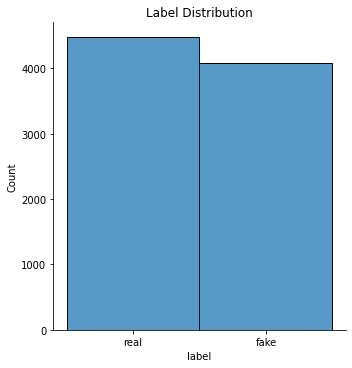

In [31]:
## Data distribution in terms of labels
print("The number of real tweets: ", len(real_tweets))
print("The number of fake tweets: ", len(fake_tweets))
sns.displot(whole_data['label']).set(title='Label Distribution')

In [32]:
## Checking data distribution in separate sets
print(sum(len(x) for x in all_tweets) / len(all_tweets))
print(sum(len(x) for x in real_tweets) / len(real_tweets))

181.89429906542057
215.37433035714287


## Extracting Tokens


In [33]:
## The function extracts the tokens (words) from a string of characters
def extract_tokens(tweets):
  tokens = ''
  for tweet in tweets:
    temp = str(tweet).lower().strip()
    temp = temp.replace('\n', ' ')
    temp = temp.replace('&amp', ' ')
    temp = temp.replace('#', ' ')
    temp = temp.replace('-', ' ')
    temp = temp.replace(';', ' ')
    temp = ' '.join(temp.split())
    tokens += temp + ' '
  return tokens

In [34]:
### Extracting the tokens from all of the tweets to see how they are distributed
all_tokens = extract_tokens(all_tweets)
real_tokens = extract_tokens(real_tweets)
fake_tokens = extract_tokens(fake_tweets)

## Visualizing the Token Distribution

In [39]:
## Creating a function to generate a wordcloud to see how the words are distributed
def get_wordcloud(token_set):
  global img_count
  ### we extended the stopword set to avoid plotting 'https' and 'co' as they 
  ###occur frequently in the links
  wordcloud = WordCloud(width = 400, height = 400, 
              background_color ='white', 
              stopwords = stopwords.union({'https','co'}), 
              min_font_size = 10).generate(token_set) 

  # plot the WordCloud image                        
  plt.figure(figsize = (6, 6), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0)
  figname = 'wordcloud'+ str(img_count)
  plt.savefig(figname) 
  img_count+=1

### All tweets Wordcloud

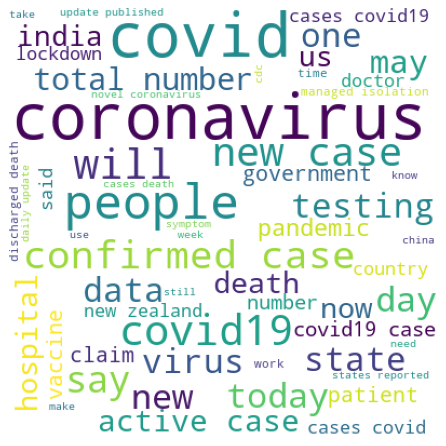

In [36]:
get_wordcloud(all_tokens)

### Fake tweets Wordcloud

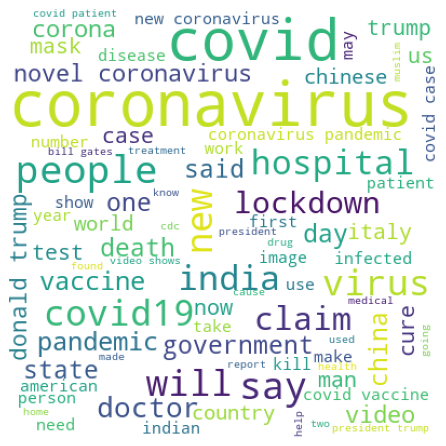

In [37]:
get_wordcloud(fake_tokens)

### Real tweets Wordcloud

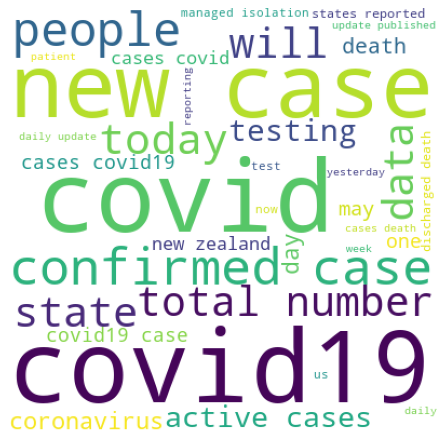

In [38]:
get_wordcloud(real_tokens)